In [1]:
import Pkg; Pkg.instantiate(); Pkg.activate()

  Activating project at `~/.julia/environments/v1.10`


In [2]:
using Pkg

# List of packages to install
packages = ["RxInfer", "Distributions", "Random", "GraphPlot", "Cairo", "Graphs", "MetaGraphsNext", "GraphPPL", "GraphViz", "Dictionaries", "Plots", "StableRNGs", "LinearAlgebra", "StatsPlots", "LaTeXStrings", "DataFrames", "CSV", "GLM"]

# Install packages if they are not already installed
for package in packages
    if !haskey(Pkg.installed(), package)
        Pkg.add(package)
    end
end


using RxInfer, Distributions, Random, GraphPlot, Cairo, Graphs, MetaGraphsNext, GraphPPL, GraphViz, Dictionaries, Plots, StableRNGs, LinearAlgebra, StatsPlots, LaTeXStrings, DataFrames, CSV, GLM

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/chrisbennett/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Pkg.jl:744
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/chrisbennett/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Pkg.jl:744
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/chrisbennett/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Pkg.jl:744
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/chrisbennett/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Pkg/src/Pkg.jl:744
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/chrisbennett/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/sh

# Coin-toss Model

In this example, we are going to perform an exact inference for a coin-toss model that can be represented as:

\begin{align}
    p(\theta) &= \text{Beta}(\theta | a, b)\\
    p(y_i | \theta) &= \text{Bernoulli}(y_i | \theta)
\end{align}

Where $y_i \in \{0, 1\}$ is a binary observation induced by Bernoulli likelihood while $\theta$ is a Beta prior distribution on the parameter of the Bernoulli Likelihood. We are interested in inferring the posterior distribution of $\theta$.

The joint probability is given by the multiplication of the likelihood and the prior, i.e.

\begin{equation}
    p(y_{1:N}, \theta) = p(\theta) \prod_{i=1}^{N} p(y_i | \theta)
\end{equation}

We can specify this model (the joint distribution) using GraphPPL's package syntax.

In [3]:
# GraphPPL.jl export `@model` macro for model specification
# It accepts a regular Julia function and builds an FFG under the hood
@model function coin_model(y, a, b)
    # We endow θ parameter of our model with some prior
    θ ~ Beta(a, b)
    # or, in this particular case, the `Uniform(0.0, 1.0)` prior also works:
    # θ ~ Uniform(0.0, 1.0)

    # We assume that outcome of each coin flip is governed by the Bernoulli distribution
    for i in eachindex(y)
        y[i] ~ Bernoulli(θ)
    end
end

In [4]:
conditioned = coin_model(a = 2.0, b = 7.0) | (y = [ true, false, true ], )

coin_model(a = 2.0, b = 7.0) conditioned on: 
  y = Bool[1, 0, 1]


In [5]:
# `Create` the actual graph of the model conditioned on the data
rxi_model = RxInfer.create_model(conditioned)

ProbabilisticModel{GraphPPL.Model{MetaGraph{Int64, SimpleGraph{Int64}, GraphPPL.NodeLabel, GraphPPL.NodeData, GraphPPL.EdgeLabel, GraphPPL.Context, MetaGraphsNext.var"#4#8", Float64}, GraphPPL.PluginsCollection{Tuple{}}, RxInfer.ReactiveMPGraphPPLBackend}}(GraphPPL.Model{MetaGraph{Int64, SimpleGraph{Int64}, GraphPPL.NodeLabel, GraphPPL.NodeData, GraphPPL.EdgeLabel, GraphPPL.Context, MetaGraphsNext.var"#4#8", Float64}, GraphPPL.PluginsCollection{Tuple{}}, RxInfer.ReactiveMPGraphPPLBackend}(Meta graph based on a SimpleGraph{Int64} with vertex labels of type GraphPPL.NodeLabel, vertex metadata of type GraphPPL.NodeData, edge metadata of type GraphPPL.EdgeLabel, graph metadata given by GraphPPL.Context(0, coin_model, "", nothing, {Bernoulli = 3, Beta = 1}, {}, {(Bernoulli, 3) = Bernoulli_10, (Beta, 1) = Beta_4, (Bernoulli, 1) = Bernoulli_6, (Bernoulli, 2) = Bernoulli_8}, {:constvar_2 = constvar_2, :θ = θ_1, :constvar_3 = constvar_3}, {:y = ResizableArray{GraphPPL.NodeLabel,1}(GraphPPL.Node

In [6]:
gppl_model = RxInfer.getmodel(rxi_model)

GraphPPL.Model{MetaGraph{Int64, SimpleGraph{Int64}, GraphPPL.NodeLabel, GraphPPL.NodeData, GraphPPL.EdgeLabel, GraphPPL.Context, MetaGraphsNext.var"#4#8", Float64}, GraphPPL.PluginsCollection{Tuple{}}, RxInfer.ReactiveMPGraphPPLBackend}(Meta graph based on a SimpleGraph{Int64} with vertex labels of type GraphPPL.NodeLabel, vertex metadata of type GraphPPL.NodeData, edge metadata of type GraphPPL.EdgeLabel, graph metadata given by GraphPPL.Context(0, coin_model, "", nothing, {Bernoulli = 3, Beta = 1}, {}, {(Bernoulli, 3) = Bernoulli_10, (Beta, 1) = Beta_4, (Bernoulli, 1) = Bernoulli_6, (Bernoulli, 2) = Bernoulli_8}, {:constvar_2 = constvar_2, :θ = θ_1, :constvar_3 = constvar_3}, {:y = ResizableArray{GraphPPL.NodeLabel,1}(GraphPPL.NodeLabel[y_5, y_7, y_9])}, {}, {}, Base.RefValue{Any}(nothing)), and default weight 1.0, GraphPPL.PluginsCollection{Tuple{}}(()), RxInfer.ReactiveMPGraphPPLBackend(), Base.RefValue{Int64}(10))

In [7]:
# Extract the MetaGraphsNext graph - we'll want to simply pass the GraphPPL.Model eventually 
meta_graph = gppl_model.graph

Meta graph based on a SimpleGraph{Int64} with vertex labels of type GraphPPL.NodeLabel, vertex metadata of type GraphPPL.NodeData, edge metadata of type GraphPPL.EdgeLabel, graph metadata given by GraphPPL.Context(0, coin_model, "", nothing, {Bernoulli = 3, Beta = 1}, {}, {(Bernoulli, 3) = Bernoulli_10, (Beta, 1) = Beta_4, (Bernoulli, 1) = Bernoulli_6, (Bernoulli, 2) = Bernoulli_8}, {:constvar_2 = constvar_2, :θ = θ_1, :constvar_3 = constvar_3}, {:y = ResizableArray{GraphPPL.NodeLabel,1}(GraphPPL.NodeLabel[y_5, y_7, y_9])}, {}, {}, Base.RefValue{Any}(nothing)), and default weight 1.0

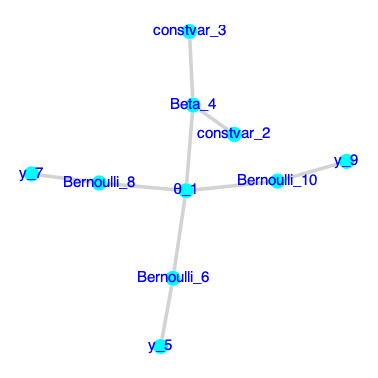

In [8]:
GraphPlot.gplot(
    meta_graph,
    layout=spring_layout,
    nodelabel=collect(labels(meta_graph)),
    nodelabelsize=1.0,
    NODESIZE=0.05, # diameter of the nodes,
    nodelabelc="blue",
    nodelabeldist=0.0,
    nodefillc="cyan",
)

# Querying The Structure of The Graph

## Contexts

After creating a GraphPPL.Model structure, it is important to know about the attached Context. The Context structure contains all variable and factor nodes in the scope of the model, and contains a Context stucture for all submodels. The context of a model can be accessed by the ```GraphPPL.getcontext()``` function:

In [9]:
fieldnames(GraphPPL.Context)

(:depth, :fform, :prefix, :parent, :submodel_counts, :children, :factor_nodes, :individual_variables, :vector_variables, :tensor_variables, :proxies, :returnval)

In [10]:
gppl_model_context = GraphPPL.getcontext(gppl_model)

Context()
 Individual variables: {:constvar_2, :θ, :constvar_3}
 Vector variables: {:y}
 Tensor variables: {}
 Proxies: {}
 Factor nodes: GraphPPL.FactorID[(Bernoulli, 3), (Beta, 1), (Bernoulli, 1), (Bernoulli, 2)]


In [11]:
function gppl_global_context_info(model::GraphPPL.Model)
    
    context = GraphPPL.getcontext(model)
    
    println("Individual variables: ", context.individual_variables)
    println("Vector variables: ", context.vector_variables)
    println("Tensor variables: ", context.tensor_variables)
    println("Proxies: ", context.proxies)
    println("Factor nodes: ", context.factor_nodes)
    println("Depth: ", context.depth)
    println("Prefix: ", context.prefix)
    println("Parent: ", context.parent)
    println("Submodel counts: ", context.submodel_counts)
    println("Children: ", context.children)
    println("Returnval: ", context.returnval)
    println("------------------------------------- Factor Nodes -------------------------------------")
    
    for factor_node in context.factor_nodes
        node_data = model[factor_node]
        println("Factor Node: ", factor_node)
        println("  Form: ", node_data.properties.fform)
        println("  Neighbors:")
        for (label, edge, neighbor) in node_data.properties.neighbors
            println("    - Label: ", label)
            println("      Edge: ", edge)
            println("      Neighbor: ", neighbor)
            println("      Type of Neighbor: ", typeof(neighbor))
            println()
        end
    end
end

gppl_global_context_info (generic function with 1 method)

In [12]:
gppl_global_context_info(gppl_model)

Individual variables: {:constvar_2 = constvar_2, :θ = θ_1, :constvar_3 = constvar_3}
Vector variables: {:y = ResizableArray{GraphPPL.NodeLabel,1}(GraphPPL.NodeLabel[y_5, y_7, y_9])}
Tensor variables: {}
Proxies: {}
Factor nodes: {(Bernoulli, 3) = Bernoulli_10, (Beta, 1) = Beta_4, (Bernoulli, 1) = Bernoulli_6, (Bernoulli, 2) = Bernoulli_8}
Depth: 0
Prefix: 
Parent: nothing
Submodel counts: {Bernoulli = 3, Beta = 1}
Children: {}
Returnval: Base.RefValue{Any}(nothing)
------------------------------------- Factor Nodes -------------------------------------
Factor Node: Bernoulli_10
  Form: Bernoulli
  Neighbors:
    - Label: y_9
      Edge: out
      Neighbor: NodeData in context  with properties name = y, index = 3
      Type of Neighbor: GraphPPL.NodeData

    - Label: θ_1
      Edge: p
      Neighbor: NodeData in context  with properties name = θ, index = nothing
      Type of Neighbor: GraphPPL.NodeData

Factor Node: Beta_4
  Form: Beta
  Neighbors:
    - Label: θ_1
      Edge: out
   

In [13]:
for (factor_ID, factor_label) in pairs(gppl_model_context.factor_nodes)
#     println("$(factor_ID), $(factor_label)")
#     println("$(typeof(factor_ID)), $(typeof(factor_label))")
    node_data = gppl_model[factor_label]
    println("$(node_data.properties.fform)\n")
end

Bernoulli

Beta

Bernoulli

Bernoulli



In [14]:
gppl_model_context.factor_nodes

4-element UnorderedDictionary{GraphPPL.FactorID, GraphPPL.NodeLabel}
 (Bernoulli, 3) │ Bernoulli_10
      (Beta, 1) │ Beta_4
 (Bernoulli, 1) │ Bernoulli_6
 (Bernoulli, 2) │ Bernoulli_8

# Current GraphViz Functionality Demo

# Coin-toss Model

In this example, we are going to perform an exact inference for a coin-toss model that can be represented as:

\begin{align}
    p(\theta) &= \text{Beta}(\theta | a, b)\\
    p(y_i | \theta) &= \text{Bernoulli}(y_i | \theta)
\end{align}

Where $y_i \in \{0, 1\}$ is a binary observation induced by Bernoulli likelihood while $\theta$ is a Beta prior distribution on the parameter of the Bernoulli Likelihood. We are interested in inferring the posterior distribution of $\theta$.

The joint probability is given by the multiplication of the likelihood and the prior, i.e.

\begin{equation}
    p(y_{1:N}, \theta) = p(\theta) \prod_{i=1}^{N} p(y_i | \theta)
\end{equation}

We can specify this model (the joint distribution) using GraphPPL's package syntax.

In [15]:
# GraphPPL.jl export `@model` macro for model specification
# It accepts a regular Julia function and builds an FFG under the hood
@model function coin_model(y, a, b)
    # We endow θ parameter of our model with some prior
    θ ~ Beta(a, b)
    # or, in this particular case, the `Uniform(0.0, 1.0)` prior also works:
    # θ ~ Uniform(0.0, 1.0)

    # We assume that outcome of each coin flip is governed by the Bernoulli distribution
    for i in eachindex(y)
        y[i] ~ Bernoulli(θ)
    end
end

In [16]:
conditioned = coin_model(a = 2.0, b = 7.0) | (y = [ true, false, true ], );

In [17]:
# `Create` the actual graph of the model conditioned on the data
rxi_model = RxInfer.create_model(conditioned);

In [18]:
gppl_model = RxInfer.getmodel(rxi_model);

In [19]:
# Extract the MetaGraphsNext graph
meta_graph = gppl_model.graph;

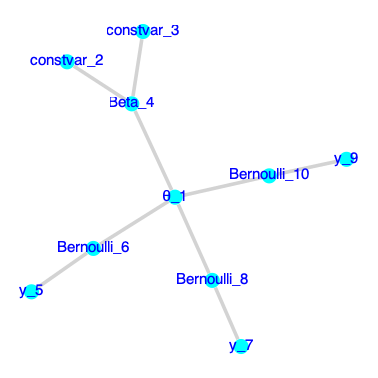

In [20]:
# The existing plotting functionality:
GraphPlot.gplot(
    meta_graph,
    layout=spring_layout,
    nodelabel=collect(labels(meta_graph)),
    nodelabelsize=1.0,
    NODESIZE=0.05, # diameter of the nodes,
    nodelabelc="blue",
    nodelabeldist=0.0,
    nodefillc="cyan",
)

# Experimentation

In [21]:
gppl_model.counter

Base.RefValue{Int64}(10)

In [22]:
println(typeof(label_for(gppl_model.graph, 1)))
println(label_for(gppl_model.graph, 1))

GraphPPL.NodeLabel
θ_1


In [23]:
for vertex in MetaGraphsNext.vertices(meta_graph)
    label = MetaGraphsNext.label_for(meta_graph, vertex)
    println("Node: ", vertex, ", Label: ", label)
end

Node: 1, Label: θ_1
Node: 2, Label: constvar_2
Node: 3, Label: constvar_3
Node: 4, Label: Beta_4
Node: 5, Label: y_5
Node: 6, Label: Bernoulli_6
Node: 7, Label: y_7
Node: 8, Label: Bernoulli_8
Node: 9, Label: y_9
Node: 10, Label: Bernoulli_10


In [24]:
collect(labels(gppl_model.graph))

10-element Vector{GraphPPL.NodeLabel}:
 θ_1
 constvar_2
 constvar_3
 Beta_4
 y_5
 Bernoulli_6
 y_7
 Bernoulli_8
 y_9
 Bernoulli_10

In [25]:
GraphPPL.NodeLabel(label_for(gppl_model.graph, 1), 200)

θ_1_200

# Potentail Taxicab Layout 

In [26]:
MetaGraphsNext.nv(meta_graph)

10

In [27]:
MetaGraphsNext.nv(meta_graph)

10

In [28]:
Graphs.nv(meta_graph)

10

# GraphViz DOT Code Generation and Visualisation (P.O.C)

In [29]:
"""
Parses the input GraphPPL.Model and uses Base.IOBuffer to 
iteratively construct a Julia string,containing the DOT 
code for the GraphViz visualisation of the graph. This 
string is then returned. 

Currently isomorphic to the display given by GraphPlot.gplot.
"""
function generate_dot(; 
        Model::GraphPPL.Model, font_size::Int, 
        edge_length::Float64 = 1.0, layout::String="neato", 
        width::Float64=10.0, height::Float64=10.0,
    )
    
    meta_graph = Model.graph # underlying MetaGraphsNext graph
    
    io_buffer = IOBuffer() # use Base.IOBuffer rather than sucessive string concatenation
    
    write(io_buffer, "dot\"\"\"\ngraph G {\n")
    write(io_buffer, "    layout=$(layout);\n")
    write(io_buffer, "    size=\"$(width),$(height)!\";\n")
    write(io_buffer, "    node [shape=circle, fontsize=$(font_size)];\n") # write initial graph DOT code to the Base.IOBuffer
    
    # Vertices/Nodes
    for vertex in MetaGraphsNext.vertices(meta_graph)
        label = MetaGraphsNext.label_for(meta_graph, vertex)
        
        properties = Model[label].properties # for dsistnguishing factor/variable nodes
        
        if isa(properties, GraphPPL.FactorNodeProperties) # Factor node
            write(io_buffer, "    \"$(label)\" [shape=square, style=filled, fillcolor=lightgray];\n")
        elseif isa(properties, GraphPPL.VariableNodeProperties) # Variable Node
            write(io_buffer, "    \"$(label)\" [shape=circle];\n")
        else
            println("ERROR: Unknown node type for label $(label)")
        end
    end
    
    # Edges
    for edge in MetaGraphsNext.edges(meta_graph)
        source_vertex = MetaGraphsNext.label_for(meta_graph, edge.src)
        dest_vertex = MetaGraphsNext.label_for(meta_graph, edge.dst)
        write(io_buffer, "    \"$(source_vertex)\" -- \"$(dest_vertex)\" [len=$(edge_length)];\n")
    end
    
    write(io_buffer, "}\n\"\"\"")
    
    final_dot_code = String(take!(io_buffer))
    
    return final_dot_code
    
end

generate_dot

In [30]:
"""
Takes the DOT string given by generate_dot and 
executes it to produce a GraphViz visualisation. 
"""
function show_gv(dot_code_graph::String)
    eval(Meta.parse(dot_code_graph))
end

show_gv

In [31]:
# create the DOT code string
coin_toss_dot = generate_dot(
    Model = gppl_model, 
    font_size = 7,
    edge_length = 1.0,
    layout = "neato",
    width = 6.0,
    height = 6.0
);

In [32]:
# Optionally write the DOT string to a file:
# file_name = "coin_toss_graph.dot"

# open(file_name, "w") do file
#     write(file, coin_toss_dot)
# end

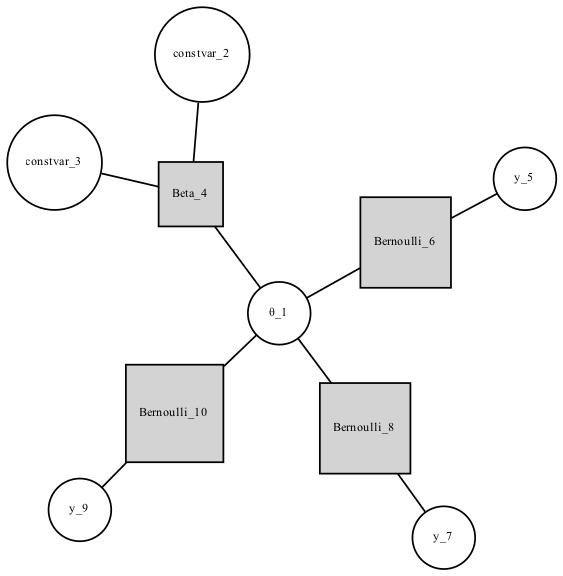

In [33]:
# execute the DOT code string
show_gv(coin_toss_dot)

# Experimental

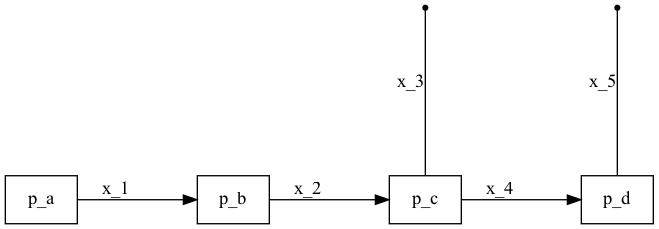

In [34]:
dot"""
digraph ForneyFactorGraph {
    // Nodes (factors) with custom positions
    pa [label="p_a", shape=box, pos="0,0!"];
    pb [label="p_b", shape=box, pos="2,0!"];
    pc [label="p_c", shape=box, pos="4,0!"];
    pd [label="p_d", shape=box, pos="6,0!"];

    // Edges (variables)
    pa -> pb [label="x_1", len=2.0];
    pb -> pc [label="x_2", len=2.0];
    pc -> x3 [label="x_3", arrowhead=none, len=2.0];
    pd -> x5 [label="x_5", arrowhead=none, len=2.0];
    pc -> pd [label="x_4", len=2.0];

    // Invisible nodes for half-edges
    x3 [shape=point, pos="4,2!"];
    x5 [shape=point, pos="6,2!"];

    // Set layout style
    layout = "neato";
}
"""

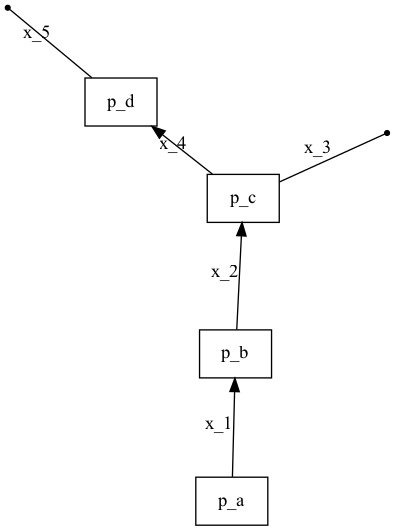

In [35]:
dot"""
digraph ForneyFactorGraph {
    // Nodes (factors)
    pa [label="p_a", shape=box];
    pb [label="p_b", shape=box];
    pc [label="p_c", shape=box];
    pd [label="p_d", shape=box];

    // Edges (variables)
    pa -> pb [label="x_1", len=1.5];
    pb -> pc [label="x_2", len=1.5];
    pc -> x3 [label="x_3", arrowhead=none, len=1.5];
    pd -> x5 [label="x_5", arrowhead=none, len=1.5];
    pc -> pd [label="x_4", len=1.5];

    // Invisible nodes for half-edges
    x3 [shape=point];
    x5 [shape=point];
    
    // Set layout style
    layout = "neato";
}
"""

## Nodes with Internal Structure

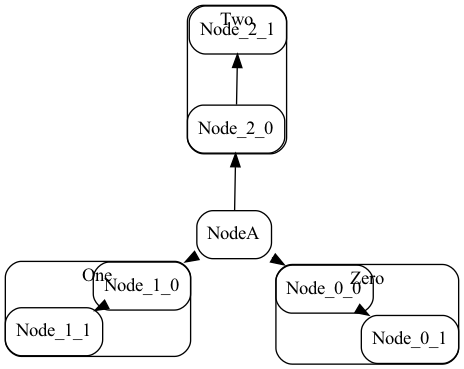

In [36]:
dot"""
digraph G {
  compound=true;
  node [ shape = "Mrecord" ];
  subgraph cluster_0 {
    style = rounded;
    label = "Zero";
	Node_0_0 -> Node_0_1;
  };
  subgraph cluster_1 {
    style = rounded;
    label = "One";
 	Node_1_0 -> Node_1_1;
  };
  subgraph cluster_2 {
    style = rounded;
    label = "Two";
    Node_2_0 -> Node_2_1;
  };
  NodeA [ style = rounded ];
  NodeA -> Node_0_0 [lhead = cluster_0];
  NodeA -> Node_1_0 [lhead = cluster_1];
  NodeA -> Node_2_0 [lhead = cluster_2];
}
"""

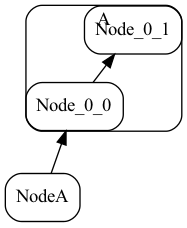

In [37]:
dot"""
digraph G {
  compound=true;
  node [ shape = "Mrecord" ];

  subgraph cluster_0 {
    style = rounded;
    label = "A";
	Node_0_0 -> Node_0_1;
  };

  NodeA [ style = rounded ];
  NodeA -> Node_0_0 [lhead = cluster_0];
}
"""

# Linear Regression Model

In [38]:
function generate_data(a, b, v, nr_samples; rng=StableRNG(1234))
    x = float.(collect(1:nr_samples))
    y = a .* x .+ b .+ randn(rng, nr_samples) .* sqrt(v)
    return x, y
end;

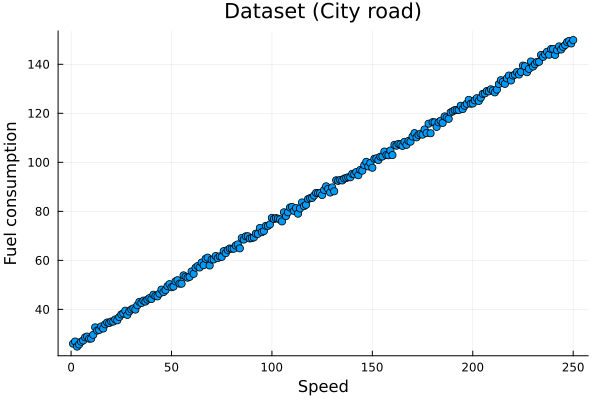

In [39]:
x_data, y_data = generate_data(0.5, 25.0, 1.0, 250)

scatter(x_data, y_data, title = "Dataset (City road)", legend=false)
xlabel!("Speed")
ylabel!("Fuel consumption")

In [40]:
@model function linear_regression(x, y)
    a ~ Normal(mean = 0.0, variance = 1.0)
    b ~ Normal(mean = 0.0, variance = 100.0)    
    y .~ Normal(mean = a .* x .+ b, variance = 1.0)
end

In [41]:
# Prepare the data
x_data = [1.0, 2.0, 3.0, 4.0, 5.0]  # example input data
y_data = [2.0, 4.1, 6.2, 8.3, 10.4];  # example observed data

In [42]:
linr_conditioned = linear_regression() | (x = x_data, y = y_data, );

In [43]:
# Create the RxInfer model and inject the data
linr_rxi_model = GraphPPL.create_model(linr_conditioned);

In [44]:
# Extract the GraphPPL.Model
linr_gppl_model = RxInfer.getmodel(linr_rxi_model);

In [45]:
# Extract the MetaGraphsNext meta graph
linr_meta_graph = linr_gppl_model.graph;

In [46]:
collect(labels(linr_meta_graph))

48-element Vector{GraphPPL.NodeLabel}:
 a_1
 constvar_2
 constvar_3
 NormalMeanVariance_4
 b_5
 constvar_6
 constvar_7
 NormalMeanVariance_8
 x_9
 x_10
 ⋮
 NormalMeanVariance_40
 constvar_41
 NormalMeanVariance_42
 constvar_43
 NormalMeanVariance_44
 constvar_45
 NormalMeanVariance_46
 constvar_47
 NormalMeanVariance_48

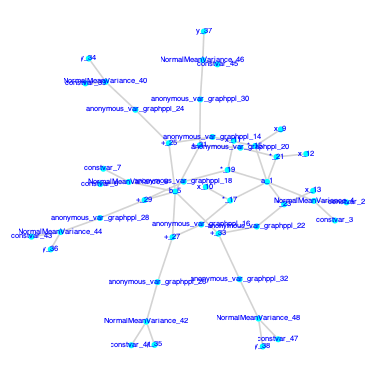

In [47]:
# The existing plotting functionality:
GraphPlot.gplot(
    linr_meta_graph,
    layout=spring_layout,
    nodelabel=collect(labels(linr_meta_graph)),
    nodelabelsize=0.1,
    NODESIZE=0.02, # diameter of the nodes,
    NODELABELSIZE=2,
    nodelabelc="blue",
    nodelabeldist=0.0,
    nodefillc="cyan"
)

In [48]:
# create the DOT code string
linr_model_dot = generate_dot(
    Model = linr_gppl_model,
    font_size = 10,
    edge_length = 2.5,
    layout = "neato",
    width = 8.0,
    height = 8.0
);

# Chris's section


In [77]:
function get_node_properties(model::GraphPPL.Model, vertex)
    # Set up return value
    namespace_variables = Dict{Symbol, Any}()

    # Get the properties of the node   
    label = MetaGraphsNext.label_for(model.graph, vertex)
    properties = model[label].properties

    # Add label to the dictionary
    namespace_variables[:label] = label
    
    # Get field names
    field_names = fieldnames(typeof(properties))

    # Add field names and values to the dictionary
    for field_name in field_names
        namespace_variables[field_name] = getproperty(properties, field_name)
    end

    return namespace_variables
end

function get_node_properties(properties::GraphPPL.FactorNodeProperties)
    # Set up return value
    namespace_variables = Dict{Symbol, Any}()
    
    # Get field names
    field_names = fieldnames(typeof(properties))

    # Add field names and values to the dictionary
    for field_name in field_names
        namespace_variables[field_name] = getproperty(properties, field_name)
    end

    return namespace_variables
end

function get_node_properties(properties::GraphPPL.VariableNodeProperties)
    # Set up return value
    namespace_variables = Dict{Symbol, Any}()
    
    # Get field names
    field_names = fieldnames(typeof(properties))

    # Add field names and values to the dictionary
    for field_name in field_names
        namespace_variables[field_name] = getproperty(properties, field_name)
    end

    return namespace_variables
end

# Chris's code
function get_namespace_variables(model::GraphPPL.Model)    
    for vertex in MetaGraphsNext.vertices(model.graph)
        node_properties = get_node_properties(model, vertex)
        println(node_properties)
    end

end

namespace_variables = get_namespace_variables(linr_gppl_model)
println(namespace_variables)

Dict{Symbol, Any}(:index => nothing, :kind => :random, :value => nothing, :link => nothing, :label => a_1, :name => :a)
Dict{Symbol, Any}(:index => nothing, :kind => :constant, :value => 0.0, :link => nothing, :label => constvar_2, :name => :constvar)
Dict{Symbol, Any}(:index => nothing, :kind => :constant, :value => 1.0, :link => nothing, :label => constvar_3, :name => :constvar)
Dict{Symbol, Any}(:label => NormalMeanVariance_4, :fform => NormalMeanVariance, :neighbors => Tuple{GraphPPL.NodeLabel, GraphPPL.EdgeLabel, GraphPPL.NodeData}[(a_1, out, NodeData in context  with properties name = a, index = nothing), (constvar_2, μ, NodeData in context  with properties name = constvar, index = nothing), (constvar_3, v, NodeData in context  with properties name = constvar, index = nothing)])
Dict{Symbol, Any}(:index => nothing, :kind => :random, :value => nothing, :link => nothing, :label => b_5, :name => :b)
Dict{Symbol, Any}(:index => nothing, :kind => :constant, :value => 0.0, :link => not

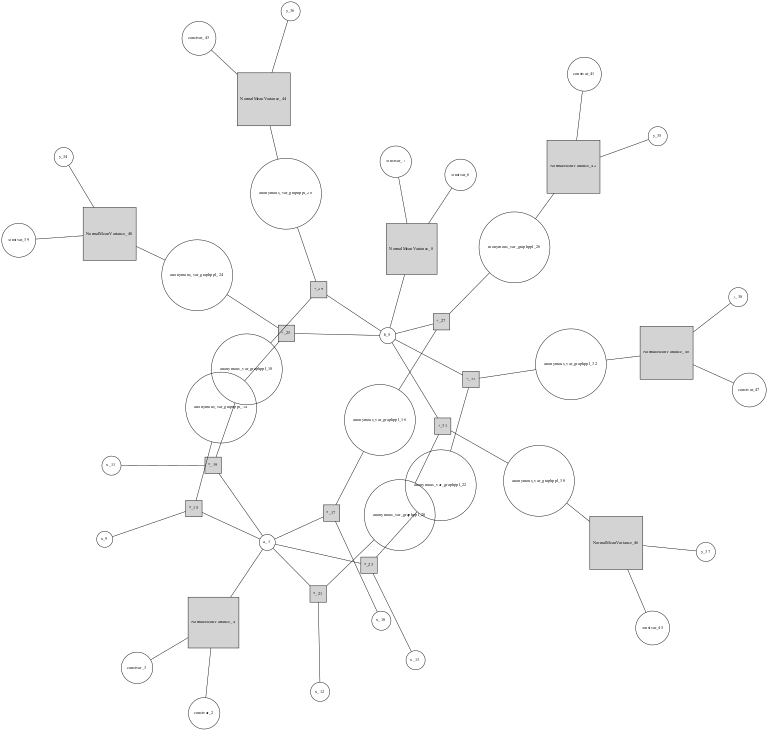

In [50]:
# execute the DOT code string
show_gv(linr_model_dot)

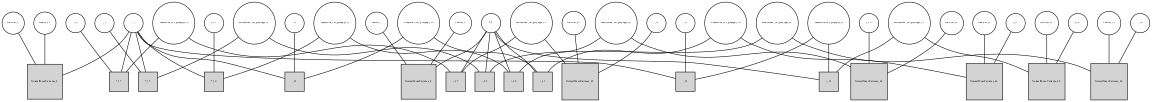

In [51]:
# Use a different graphViz layout engine: "dot"
linr_model_dot_2 = generate_dot(
    Model = linr_gppl_model,
    font_size = 5,
    edge_length = 2.5,
    layout = "dot",
    width = 12.0,
    height = 12.0
);

# execute the DOT code string
show_gv(linr_model_dot_2)

# Experimentation with Other Features (Highy Disorganised):

# Tikz/PGF

In [52]:
preamble = """\\documentclass{standalone}
\\usepackage{tikz}
\\usetikzlibrary{graphs,graphdrawing,quotes}
\\usegdlibrary{force}

\\begin{document}
\\begin{tikzpicture}
  \\graph [spring layout, node distance=20mm,
 nodes={draw, circle, fill=blue, text=white},
  edge quotes={fill=yellow, inner sep=2pt}]
  {\n"""

postamble = """};
\\end{tikzpicture}
\\end{document}"""

G = meta_graph

tex_code = preamble

for vertex in MetaGraphsNext.vertices(G)
    tex_code *= "    $(vertex) [as={\$n_{$(vertex)}\$}];\n"
end

for edge in MetaGraphsNext.edges(G)
    source_vertex = MetaGraphsNext.label_for(G, edge.src)
    dest_vertex = MetaGraphsNext.label_for(G, edge.dst)
    tex_code *= "    $(source_vertex) -- $(dest_vertex);\n"
end

tex_code *= postamble

# Write the TikZ code to a .tex file
file_path = "tikz_graph.tex"
open(file_path, "w") do file
    write(file, tex_code)
end

765

In [53]:
for edge in MetaGraphsNext.edges(meta_graph)
    println("$(edge.src)")
    println("$(MetaGraphsNext.label_for(meta_graph, edge.src))\n")
#     dot_code *= "    $(edge.src) -> $(edge.dst);"
end

1
θ_1

1
θ_1

1
θ_1

1
θ_1

2
constvar_2

3
constvar_3

5
y_5

7
y_7

9
y_9



In [54]:
for edge in MetaGraphsNext.edges(meta_graph)
    println("$(edge.dst)")
    println("$(MetaGraphsNext.label_for(meta_graph, edge.src))\n")
#     dot_code *= "    $(edge.src) -> $(edge.dst);"
end

4
θ_1

6
θ_1

8
θ_1

10
θ_1

4
constvar_2

4
constvar_3

6
y_5

8
y_7

10
y_9



In [55]:
typeof(MetaGraphsNext.edges(meta_graph))

Graphs.SimpleGraphs.SimpleEdgeIter{SimpleGraph{Int64}}

In [56]:
MetaGraphsNext.label_for(meta_graph, 1)

θ_1

In [57]:
for i in 1:length(collect(labels(meta_graph)))
    println(MetaGraphsNext.label_for(meta_graph, i))
end

θ_1
constvar_2
constvar_3
Beta_4
y_5
Bernoulli_6
y_7
Bernoulli_8
y_9
Bernoulli_10


In [58]:
collect(labels(meta_graph))

10-element Vector{GraphPPL.NodeLabel}:
 θ_1
 constvar_2
 constvar_3
 Beta_4
 y_5
 Bernoulli_6
 y_7
 Bernoulli_8
 y_9
 Bernoulli_10

In [59]:
for vertex in MetaGraphsNext.vertices(meta_graph)  # add nodes
    println(MetaGraphsNext.label_for(meta_graph, vertex))
end

θ_1
constvar_2
constvar_3
Beta_4
y_5
Bernoulli_6
y_7
Bernoulli_8
y_9
Bernoulli_10


# Old Functionality (String Concat)

In [60]:
"""
A helper function to wrap GraphViz DOT code in the 
command string used with GraphViz.jl 
"""
function wrap_dot_code(dot_code::String)
    return "dot\"\"\"\n$dot_code\n\"\"\""
end

wrap_dot_code

In [61]:
"""
Basic visualisation of a GraphPPL.Model with GraphViz.
Isomorphic to the display given by GraphPlot.gplot.
"""
function show_gv_V2(; Model::GraphPPL.Model, font_size::Int, edge_length::Float64 = 1.0)
    
    meta_graph = Model.graph # underlying MetaGraphsNext graph
    
    
    dot_code = """
    graph G {
        node [shape=circle, fontsize=$(font_size)];
    """
    
    # Vertices/Nodes
    for vertex in MetaGraphsNext.vertices(meta_graph)
        label = MetaGraphsNext.label_for(meta_graph, vertex)
        
        properties = Model[label].properties # for dsistnguishing factor/variable nodes
        
        if isa(properties, GraphPPL.FactorNodeProperties) # Factor node
            dot_code *= "    \"$(label)\" [shape=square, style=filled, fillcolor=lightgray];\n"
        elseif isa(properties, GraphPPL.VariableNodeProperties) # Variable Node
            dot_code *= "    \"$(label)\" [shape=circle];\n"
        else
            println("ERROR: Unknown node type for label $(label)")
        end
    end
    
    # Edges
    for edge in MetaGraphsNext.edges(meta_graph)
        source_vertex = MetaGraphsNext.label_for(meta_graph, edge.src)
        dest_vertex = MetaGraphsNext.label_for(meta_graph, edge.dst)
        dot_code *= "    \"$(source_vertex)\" -- \"$(dest_vertex)\" [len=$(edge_length)];\n"
    end
    
    dot_code *= "}"

    wrapped_dot_code = wrap_dot_code(dot_code)
    
    eval(Meta.parse(wrapped_dot_code)) # not ideal, but used for this example
end

show_gv_V2

In [63]:
"""
Basic visualisation a GraphPPL.Model with GraphViz.
Isomorphic to the display given by GraphPlot.gplot.
"""
function show_gv_OG(; Model::GraphPPL.Model, font_size::Int)
    
    meta_graph = Model.graph # underlying MetaGraphsNext graph
    
    dot_code = """
    graph G {
        node [shape=circle, fontsize=$(font_size)];
    """

#     for vertex in MetaGraphsNext.vertices(G)  # add nodes
#         dot_code *="    $(MetaGraphsNext.label_for(G, vertex));\n"
#     end
    
    for vertex in MetaGraphsNext.vertices(meta_graph)
        label = MetaGraphsNext.label_for(meta_graph, vertex)
        if isa(Model[label].properties, GraphPPL.FactorNodeProperties{GraphPPL.NodeData})
            dot_code *="    $(MetaGraphsNext.label_for(meta_graph, vertex)) [shape=square];\n"
        elseif isa(Model[label].properties, GraphPPL.VariableNodeProperties{GraphPPL.NodeData})
            dot_code *="    $(MetaGraphsNext.label_for(meta_graph, vertex)) [shape=circle];\n"
        else
            println("ERROR")
        end
    end
    
#     for (factor_id, node_label) in pairs(gppl_model_context.factor_nodes)
#         # get vertex code from the meta graph
#         # test if this vertex code belongs to a node factor 
#         #     if yes, make this node's shape square
#         println("TESTING")
#     end

    for edge in MetaGraphsNext.edges(meta_graph)  # add edges
        source_vertex = MetaGraphsNext.label_for(meta_graph, edge.src)
        dest_vertex = MetaGraphsNext.label_for(meta_graph, edge.dst)
        dot_code *= "    $(source_vertex) -- $(dest_vertex);\n"
    end
    
    dot_code *= "}"

    wrapped_dot_code = wrap_dot_code(dot_code)
    
    eval(Meta.parse(wrapped_dot_code)) # not ideal 

end

show_gv_OG